In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [257]:
# Parameters

def initialize():
    global ampol
    global N
    global amthe
    global d
    global eps
    global sig
    global T
    global kB
    global x
    global y
    global status
    global polweight
    global weights
    global wtot
    global wave
    
    ampol = 100    # Starting amount of polymers
    N = 30        # Amount of steps
    amthe = 6     # Amount of possible angles

    d = 1         # Distance between neighbours
    eps = 0.25
    sig = 0.8
    T = 1.0       # Temperature
    kB = 1.0

    # Coordinates

    x = np.zeros((ampol,N))
    y = np.zeros((ampol,N))
    x[:,1] = 1.0
    
    status = np.zeros(ampol)
    polweight = np.ones(ampol)
    weights = np.zeros((ampol,N))
    wtot = np.zeros(N)
    wave = np.zeros(N)

# function add bead

def add_bead(polnum,beadnum):
    
    global x
    global y
    global weights
    global polweight
    
    # distances, energies and angles

    r = np.zeros(N-1)
    Eb = np.zeros(N-1)
    posthe = np.zeros(amthe)   #array of possible theta
    w = np.zeros(amthe)        #possible weights per theta
    Pr = np.zeros(amthe)       #Probability of weights
    
    W = 0
    while W == 0.0:
        randoff = np.random.uniform(0,1) #random offset for angle
        for j in range (0,amthe):
            theta = randoff + j*2*np.pi/amthe
            x[polnum,beadnum] = x[polnum,beadnum-1] + d*np.cos(theta)
            y[polnum,beadnum] = y[polnum,beadnum-1] + d*np.sin(theta)
            for i in range (0,beadnum):
                r[i] = ((x[polnum,i]-x[polnum,beadnum])**2+(y[polnum,i]-y[polnum,beadnum])**2)**0.5 #determine distance to other beads
                Eb[i] = 4*eps*((sig/r[i])**12-(sig/r[i])**6) #energy per other bead
            E = np.sum(Eb) #total energy of step
            w[j] = np.exp(-E/(kB*T))
        W = np.sum(w)
        polweight[polnum] = polweight[polnum]*W*(1/(0.75*amthe))

    randang = np.random.uniform(0,1) #random nr for determining angle
    cump = 0.0
    for j in range (0,amthe):
        Pr[j] = w[j]/W #determine probability of angle
        cump = cump + Pr[j]
        if randang <= cump: #determine angle
            theta = randoff + j*2*np.pi/amthe
            weights[polnum,beadnum] = w[j]
            break

    x[polnum,beadnum] = x[polnum,beadnum-1] + d*np.cos(theta)
    y[polnum,beadnum] = y[polnum,beadnum-1] + d*np.sin(theta)

    
def check_polweight(polnum,beadnum): #set weights and limits for chosen angle

    global ampol
    global x
    global y
    global status
    global polweight
    global weights
    global wtot
    global wave
    global deadcount
    global duplicated
    
    
    wtot[beadnum] = np.sum(weights[:,beadnum])
    wave[beadnum] = wtot[beadnum]/(polnum+1)
    uplim = 2.0*wave[beadnum]/weights[polnum,2]
    lowlim = 1.0*wave[beadnum]/weights[polnum,2]

    if polweight[polnum] < lowlim:
        R = np.random.uniform(0,1)
        if R < 0.5:
            polweight[polnum] *= 2
        else:
            status[polnum] = 1.0
            deadcount += 1
        
    elif polweight[polnum] > uplim:
        polweight[polnum] *= 0.5
        x = np.append(x, [x[polnum,:]], axis=0)
        y = np.append(y, [y[polnum,:]], axis=0)
        status = np.append(status, 0.0)
        polweight = np.append(polweight, polweight[polnum])
        weights = np.append(weights, [weights[polnum,:]],axis=0)
        duplicated += 1
               
    
def run_simulation():
    
    global ampol
    global x
    global y
    global status
    global polweight
    global weights
    global deadcount
    global duplicated
    
    initialize()
    
    for beadnum in range (2,N):
        
        deadcount = 0
        duplicated = 0
        
        for polnum in range (0,ampol):
            add_bead(polnum,beadnum)
        for polnum in range (0,ampol):
            check_polweight(polnum,beadnum)
        
        delpollist = np.where(status > 0)
        
        for delpol in delpollist:
            x = np.delete(x, delpol, axis=0)
            y = np.delete(y, delpol, axis=0)
            polweight = np.delete(polweight,delpol)
            weights = np.delete(weights, delpol, axis=0)
            status = np.delete(status, delpol)
        
        ampol = np.size(x,0)
        
        
        #print('#polymers %r, deaths %r, duplicated %r, prev %r' %(ampol,deadcount,duplicated,ampol+deadcount-duplicated))
        

def end_to_end():
    global x
    global y
    
    run_simulation()
    
    R_sq = np.mean((x[:,:]**2 + y[:,:]**2), axis=0)
    
    plt.plot(R_sq)
        

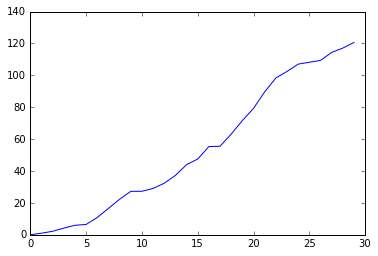

In [258]:
end_to_end()

In [259]:
0

0